## Pair Programming EDA


Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.


Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


# Objetivos

- Buscar un conjunto de datos a analizar

Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
pd.options.display.max_columns = None

Elegimos un dataset sobre nivel de satisfacción de pasajeros de una aerolínea

In [3]:
df = pd.read_csv("../datos/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


# Análisis Exploratorio 


Limpiamos y unificamos el formato de las columnas para poder trabajar mejor con ellas

In [5]:
nuevas_columnas = {col: col.replace(" ", "_").lower() for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [6]:
df.shape

(129880, 23)

In [7]:
df.info

<bound method DataFrame.info of         satisfaction  gender      customer_type  age   type_of_travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           class  flight_distance  seat_comfort  \
0            Eco              265       

Sacamos las columnas categóricas no numéricas

In [8]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
gender,129880,2,Female,65899
customer_type,129880,2,Loyal Customer,106100
type_of_travel,129880,2,Business travel,89693
class,129880,3,Business,62160


Buscamos los nulos, solo los hay en una columna

In [9]:
df.isnull().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

Exploramos el tipo de datos de cada columna

In [10]:
df.dtypes

satisfaction                          object
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_de

Exploramos la columna con nulos

In [11]:
df['arrival_delay_in_minutes'].dtypes

dtype('float64')

Calculamos el porcentaje de nulos en relación a la totalidad del dataframe

In [12]:
nulos = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
nulos.columns = ["columna", "porcentaje"]
nulos

,columna,porcentaje
0,satisfaction,0.000000
1,gender,0.000000
2,customer_type,0.000000
3,age,0.000000
4,type_of_travel,0.000000
5,class,0.000000
6,flight_distance,0.000000
7,seat_comfort,0.000000
8,departure/arrival_time_convenient,0.000000
9,food_and_drink,0.000000


Exploramos los valores únicos de las columnas para poder entender mejor la información y la codificación de los datos; son realmente numéricos? 
Poco a poco vemos que las columnas numéricas realmente categóricas ya han sido codificadas 

In [13]:
for column in df:
    print(df[column].unique())

['satisfied' 'dissatisfied']
['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
['Personal Travel' 'Business travel']
['Eco' 'Business' 'Eco Plus']
[ 265 2464 2138 ... 5832 5120 4260]
[0 1 4 5 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[2 3 4 1 5 0]
[2 0 3 4 5 1]
[4 2 0 3 5 1]
[2 3 4 5 1 0]
[3 2 1 5 4 0]
[3 4 1 2 5 0]
[0 4 3 2 5 1]
[3 4 1 2 5]
[5 2 4 3 1 0]
[3 4 1 2 5 0]
[2 3 5 4 1 0]
[   0  310   17   30   47   40    5    2   34    4   13  427   15   10
   16   11    9    1   19   35   14    6   27   20    3   90   12   68
   93    7   29   66   97  151   64   31  140   32    8   23   24   37
   80   18   89  127   84  158   26   25   72  180  143  106  178   94
   70   77   21   60  129   61   38   33   45  244  122   57   95  293
   44  184  186  145  101  165 

Sustituimos los nulos por la media ya que en este contexto (retrasos en el aterrizaje) es el método que menos alterará la calidad de los datos

In [14]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median ,inplace = True)

Comprobamos si se han sustituido correctamente

In [15]:
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure/arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

Buscamos duplicados a eliminar 

In [16]:
df.duplicated().sum()

0

Con esta función compararemos parejas de columnas que nos puedan parecer similares temáticamente para ver si aportan la misma información. Además nos crea un pieplot para poder visualizar los datos. De ser así eliminaremos una de ellas para reducir nuestro dataframe.

In [17]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

In [18]:
lista_servicios = ['inflight_wifi_service', 'inflight_entertainment']

 Los valores únicos para la variable inflight_wifi_service son: [2, 0, 3, 4, 5, 1]
 Los valores únicos para la variable inflight_entertainment son: [4, 2, 0, 3, 5, 1]


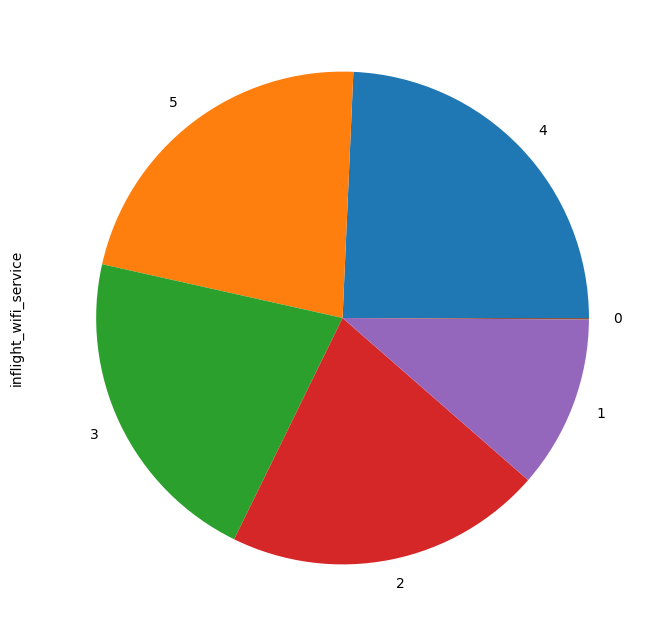

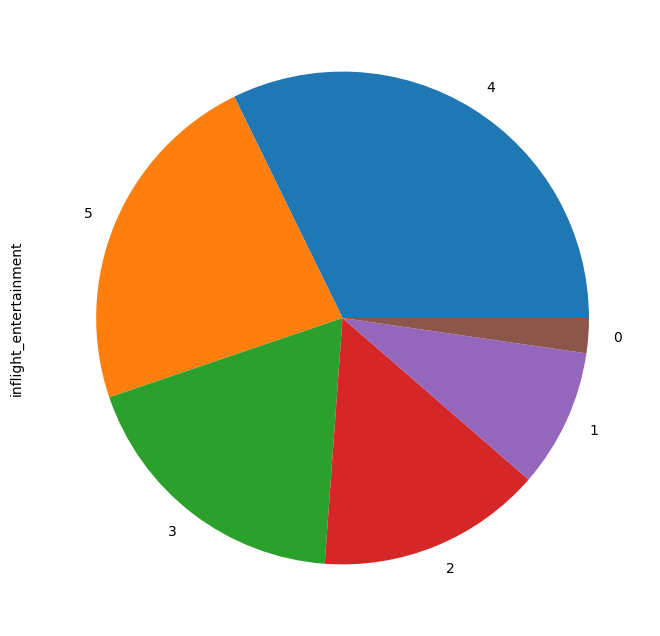

In [19]:
similar_variables(lista_servicios)

In [20]:
lista_checkin = ['baggage_handling','checkin_service']

 Los valores únicos para la variable baggage_handling son: [3, 4, 1, 2, 5]
 Los valores únicos para la variable checkin_service son: [5, 2, 4, 3, 1, 0]


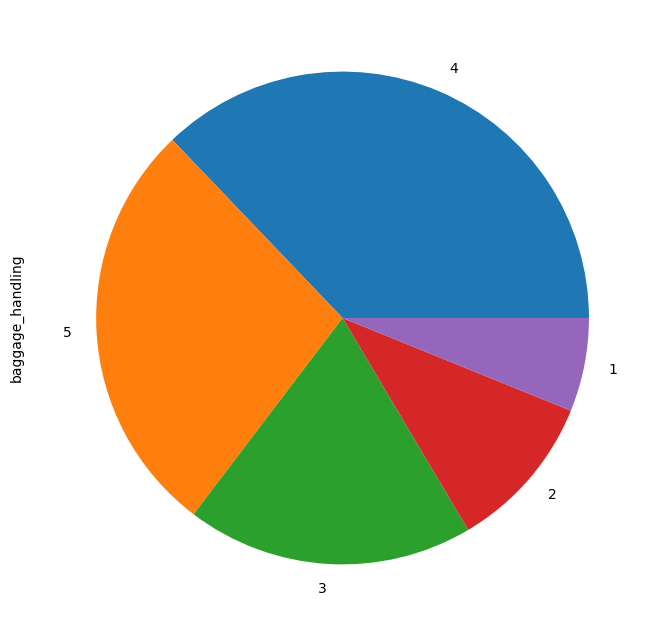

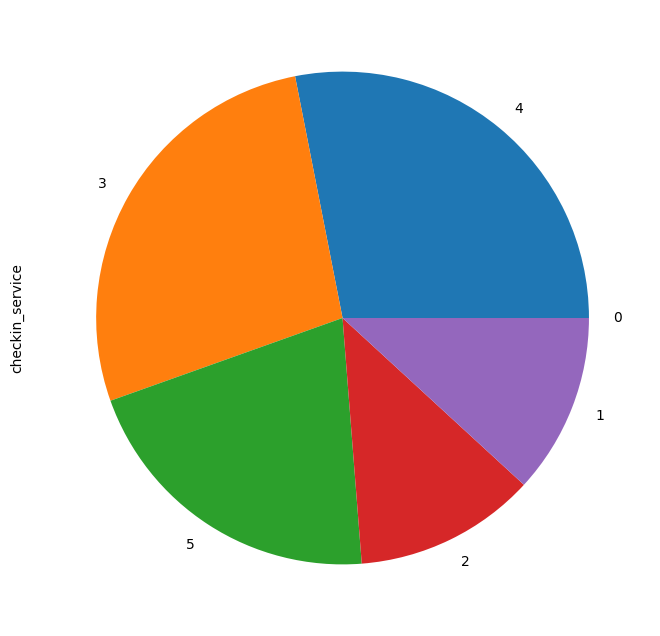

In [21]:
similar_variables(lista_checkin)

No parecen iguales, no podríamos eliminarlas, además tienen un número diferente de valores únicos

In [22]:
lista_confort = ['seat_comfort', 'leg_room_service']

 Los valores únicos para la variable seat_comfort son: [0, 1, 4, 5, 2, 3]
 Los valores únicos para la variable leg_room_service son: [0, 4, 3, 2, 5, 1]


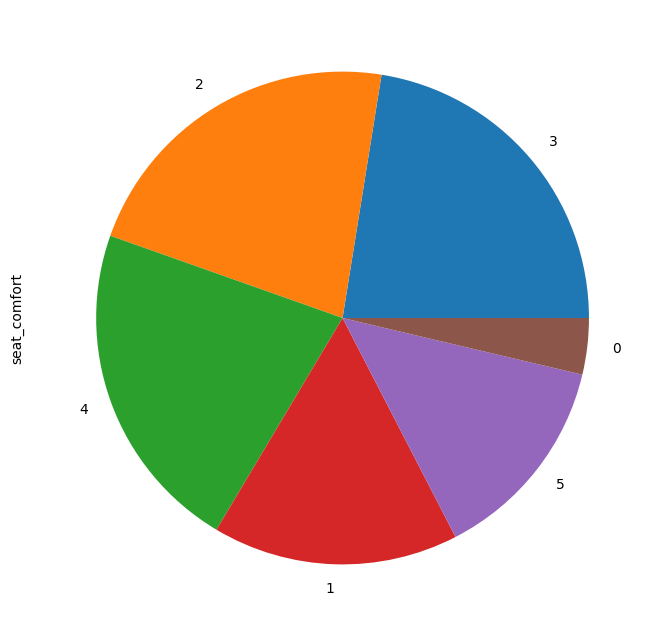

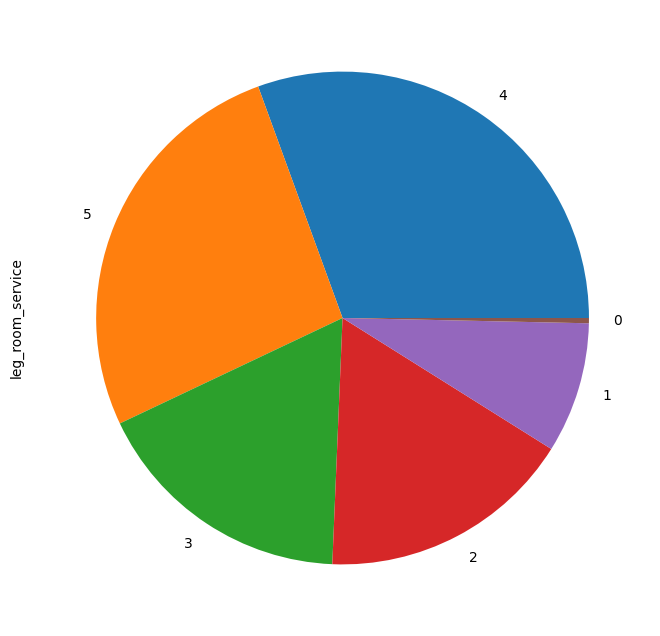

In [23]:
similar_variables(lista_confort)

Por contrario a lo que pensábamos no se parecen demasiado

In [24]:
lista_online = ['online_support','ease_of_online_booking']

 Los valores únicos para la variable online_support son: [2, 3, 4, 5, 1, 0]
 Los valores únicos para la variable ease_of_online_booking son: [3, 2, 1, 5, 4, 0]


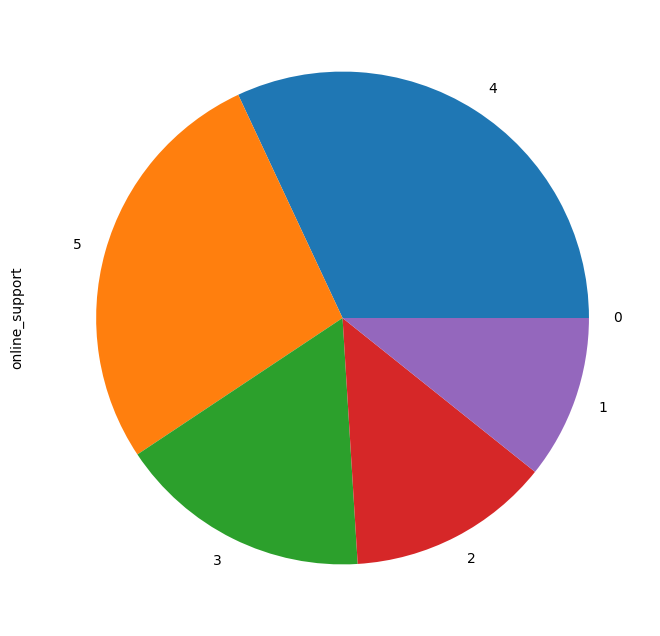

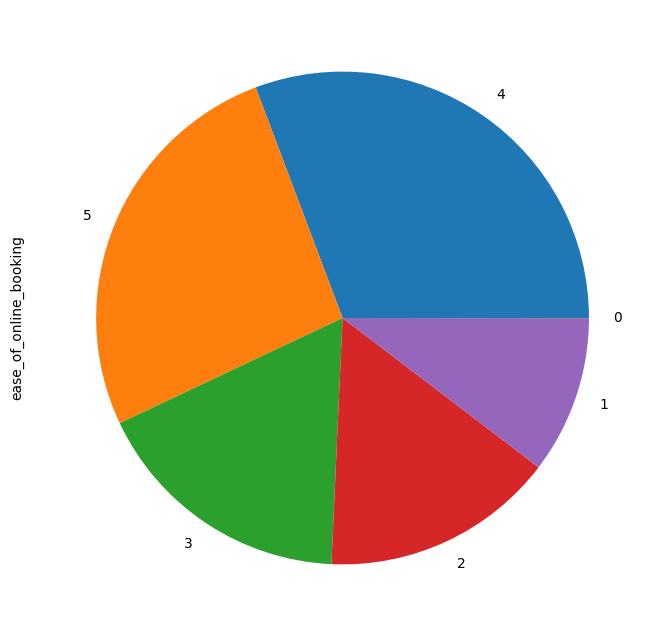

In [25]:
similar_variables(lista_online)

Son casi iguales, así que podremos borrar una de las dos

In [26]:
df.drop(['ease_of_online_booking'], axis =1, inplace = True)

In [27]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,0,3,5,3,2,0,0.0


Exploramos la columna de satisfaction para poder entender mejor el contenido de nuestro dataset y así poder tomar decisiones que aporten valor a nuestro análisis. Vemos que los porcentajes de clientes satisfechos e insatisfechos son muy similares, aunque con una ligera ventaja de los primeros.

In [28]:
df["satisfaction"].value_counts() / df.shape[0]

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

Lo mostramos de manera visual mediante un countplot

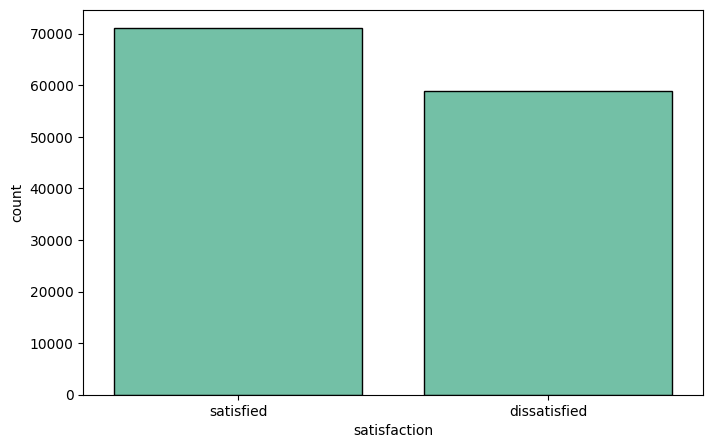

In [29]:
plt.figure(figsize=(8,5)) 
fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["satisfied", "dissatisfied"]) 
plt.show();

### Variable respuesta

Decidimos que usaremos la columna satisfaction como variable respuesta

In [30]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

Vemos que es una variable dicotómica, perfecta para regresión logística

### Variables catégoricas

Vamos a separar las categóricas y las numéricas

In [31]:
variables_categoricas = df.select_dtypes( include= 'object')

In [32]:
variables_categoricas

,satisfaction,gender,customer_type,type_of_travel,class,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0.0
1,satisfied,Male,Loyal Customer,Personal Travel,Business,305.0
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0.0
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0.0
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0.0
...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,Personal Travel,Eco,0.0
129876,dissatisfied,Male,disloyal Customer,Personal Travel,Business,172.0
129877,dissatisfied,Male,disloyal Customer,Personal Travel,Eco,163.0
129878,dissatisfied,Male,disloyal Customer,Personal Travel,Eco,205.0


In [33]:
columnas_c = df[['gender', 'customer_type', 'type_of_travel', 'class']]

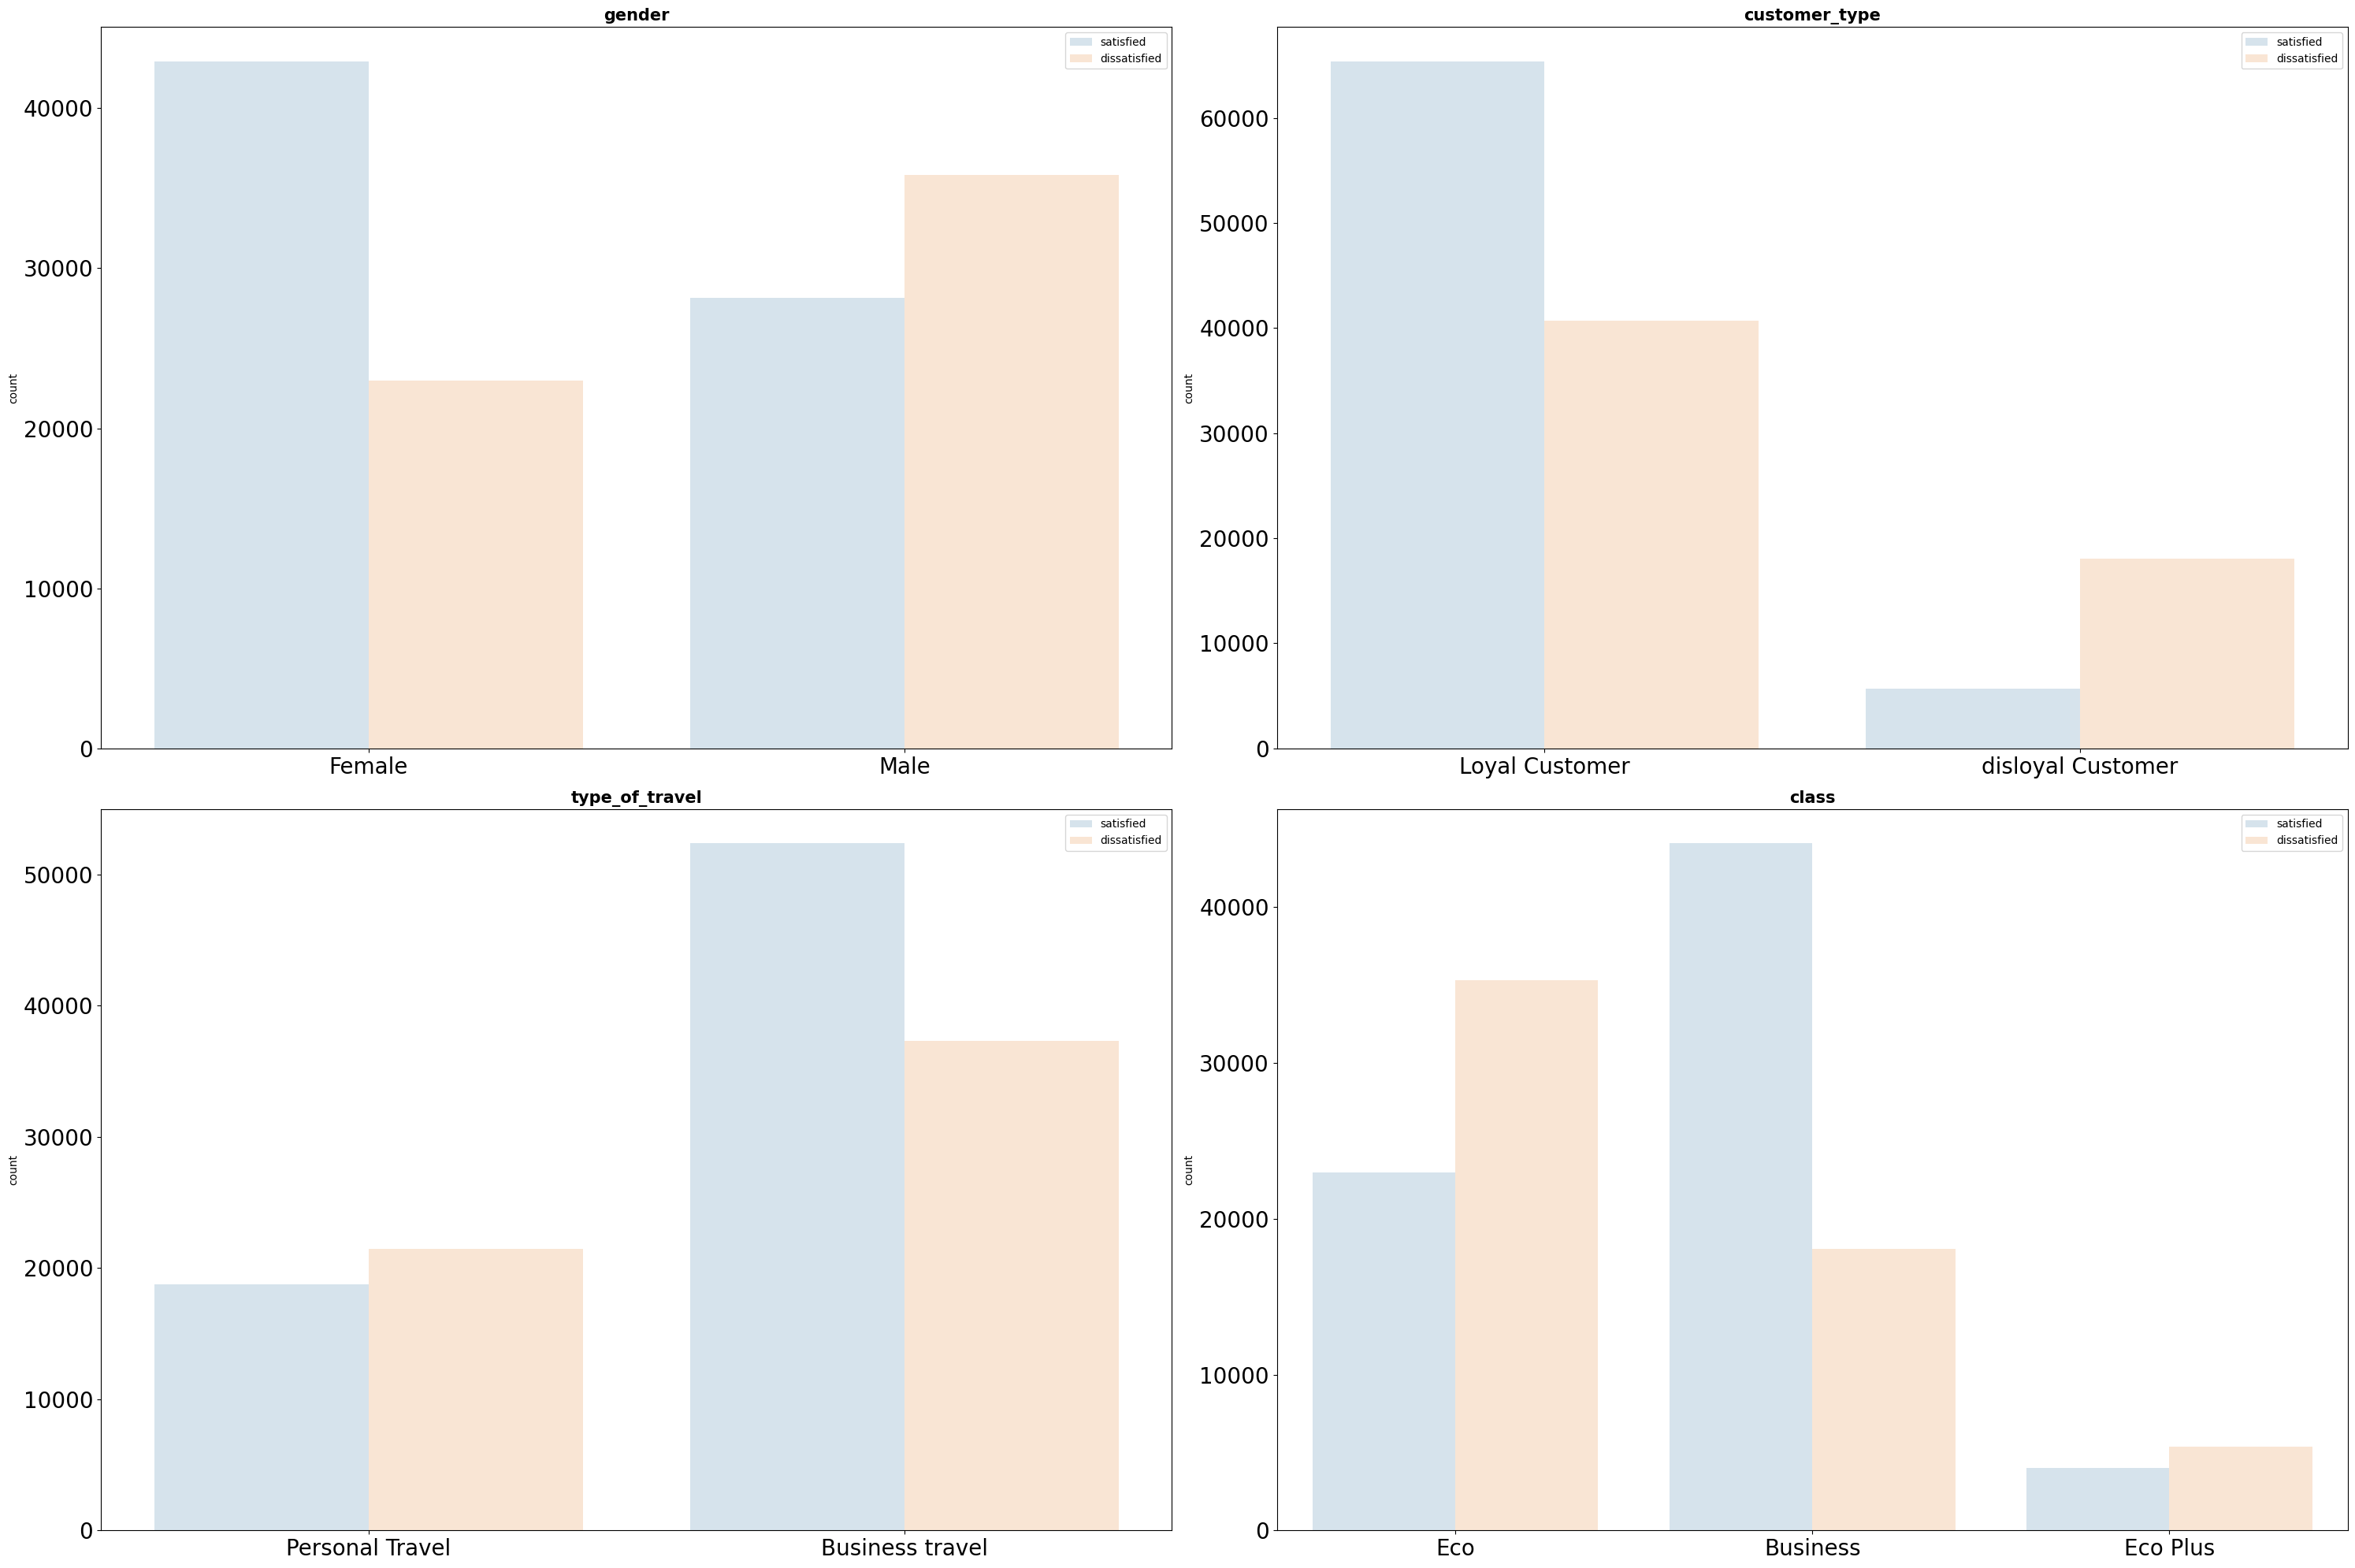

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))

axes = axes.flat


for i, colum in enumerate(columnas_c.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

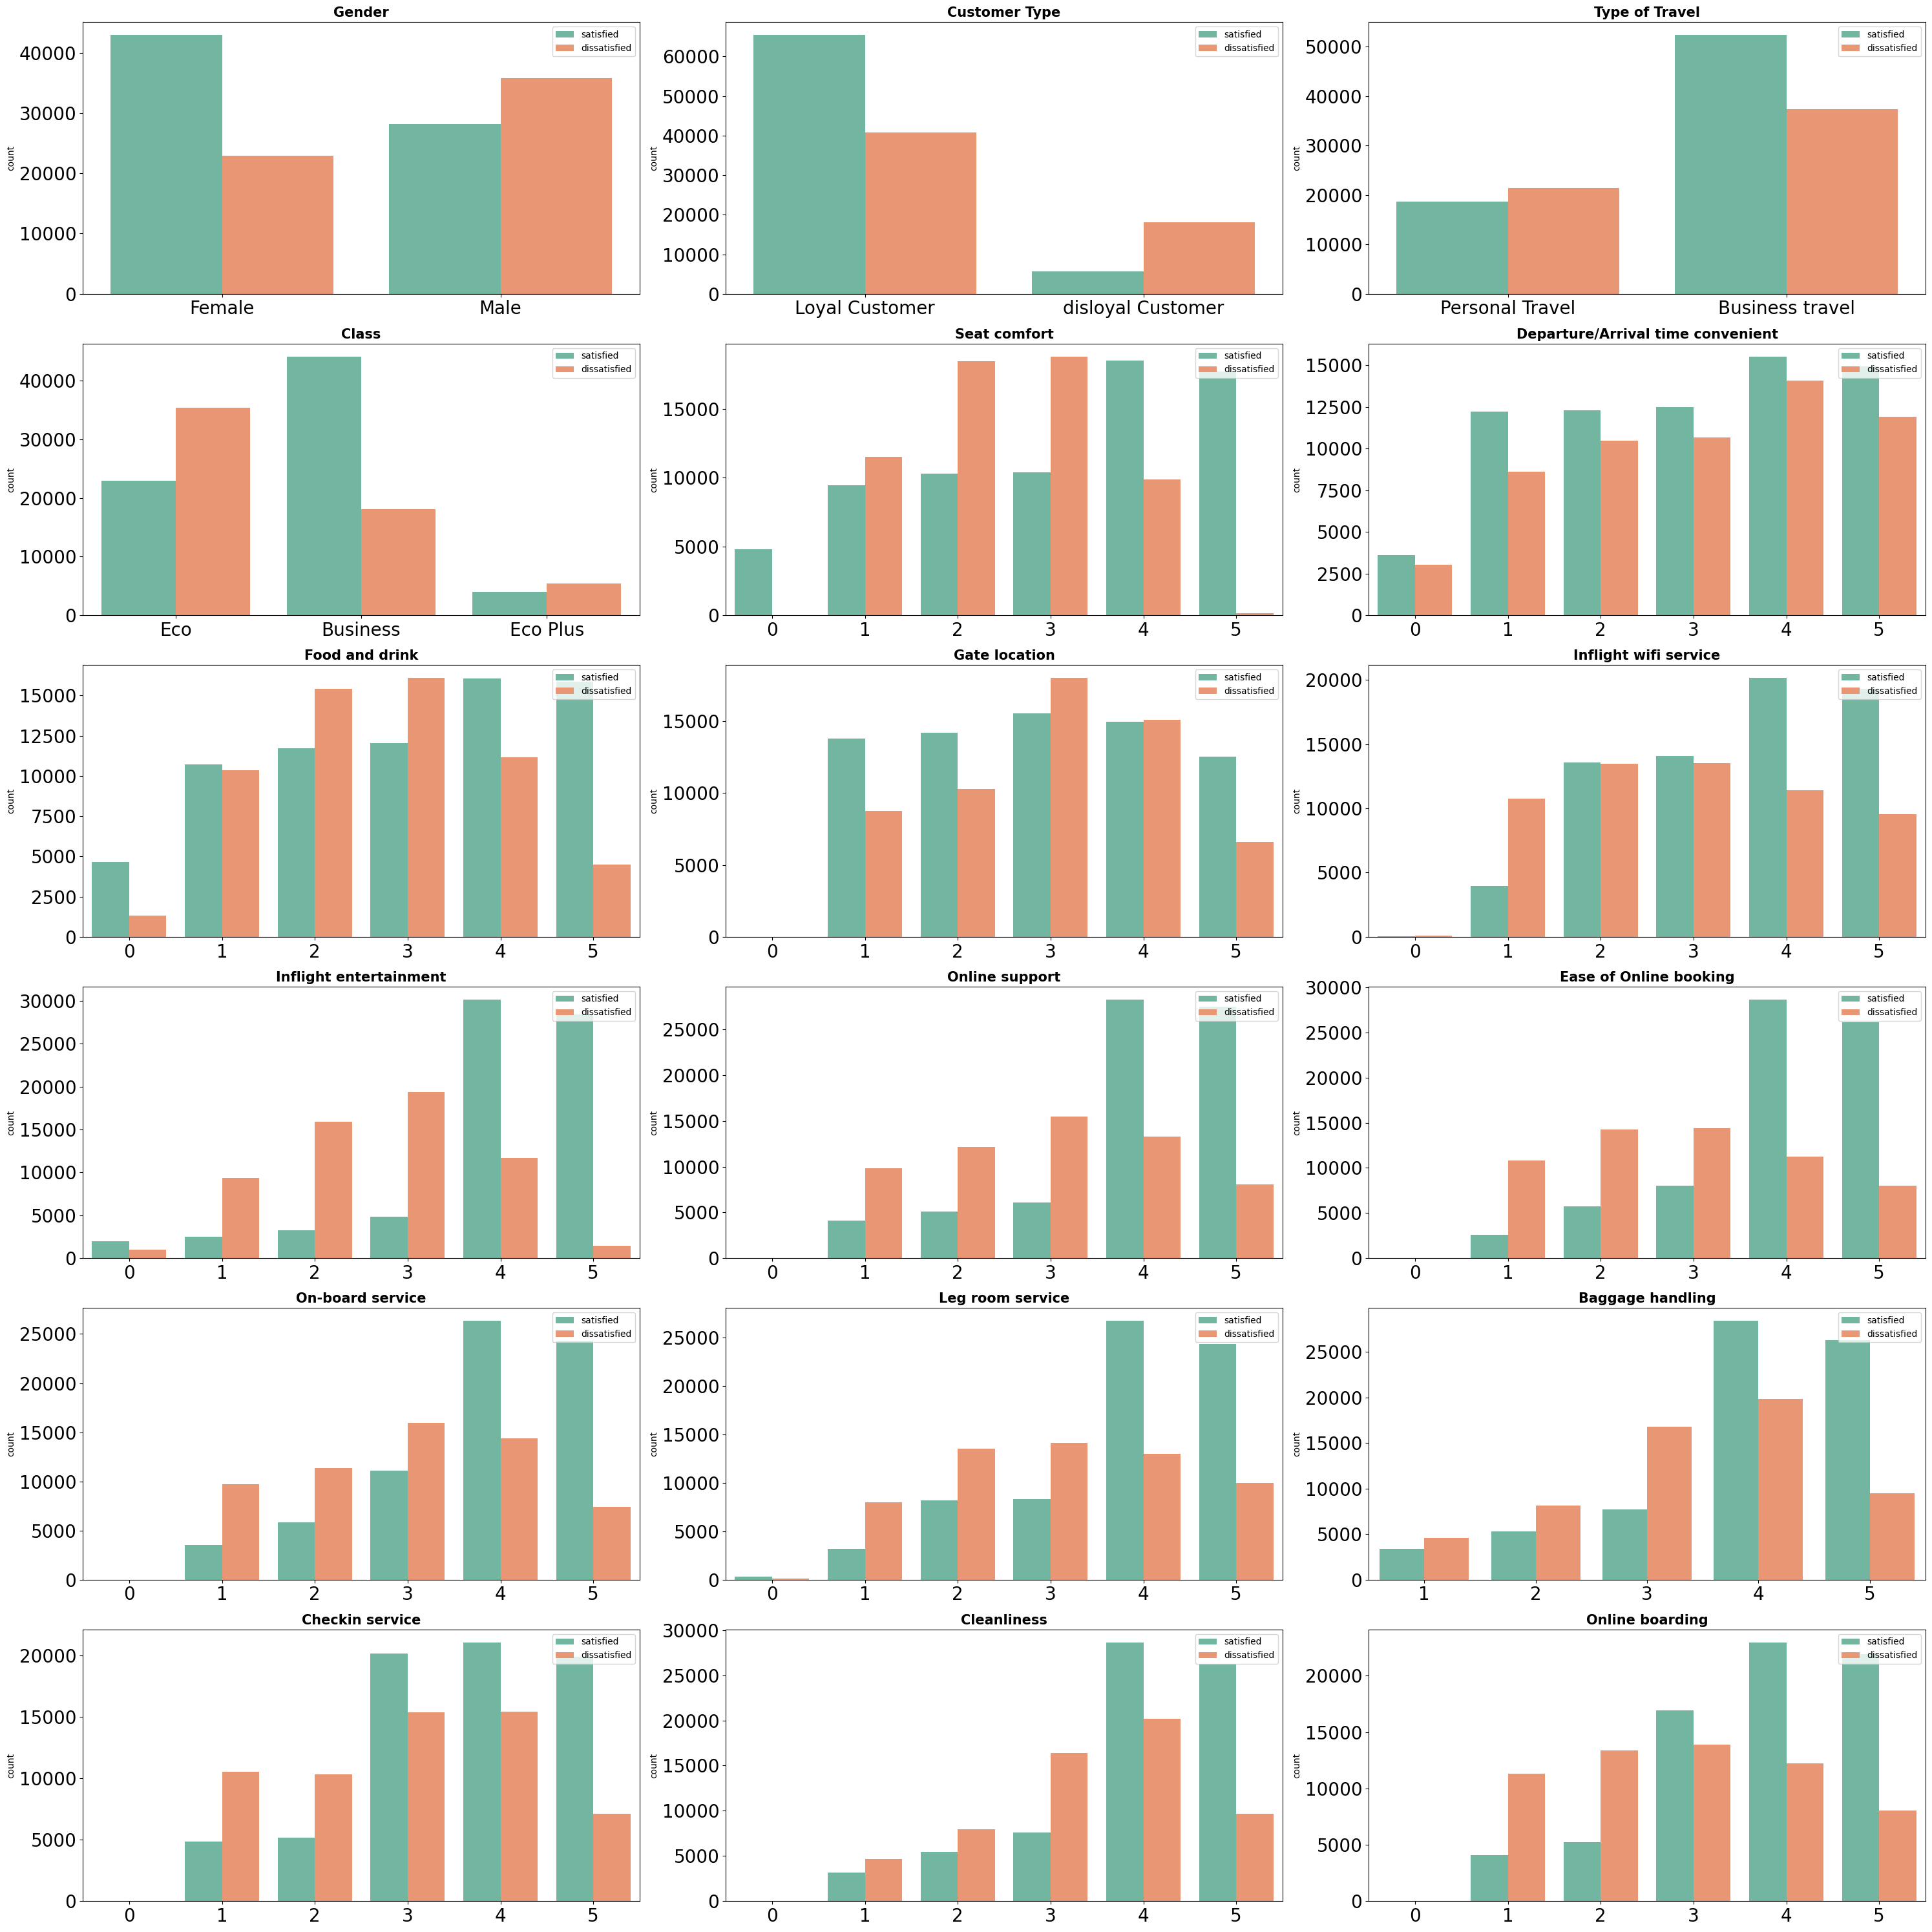

In [11]:


fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

axes = axes.flat

df_countplot = df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Age', 'Flight Distance', 'satisfaction'], axis=1)

for i, colum in enumerate(df_countplot.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i], palette="Set2")
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();



Aislamos las columnas numéricas en un nuevo dataframe, df_numericas 

In [35]:
df_numericas = df[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']]
df_numericas.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0.0
1,47,2464,310,305.0
2,15,2138,0,0.0
3,60,623,0,0.0
4,70,354,0,0.0


TypeError: Invalid object type at position 245

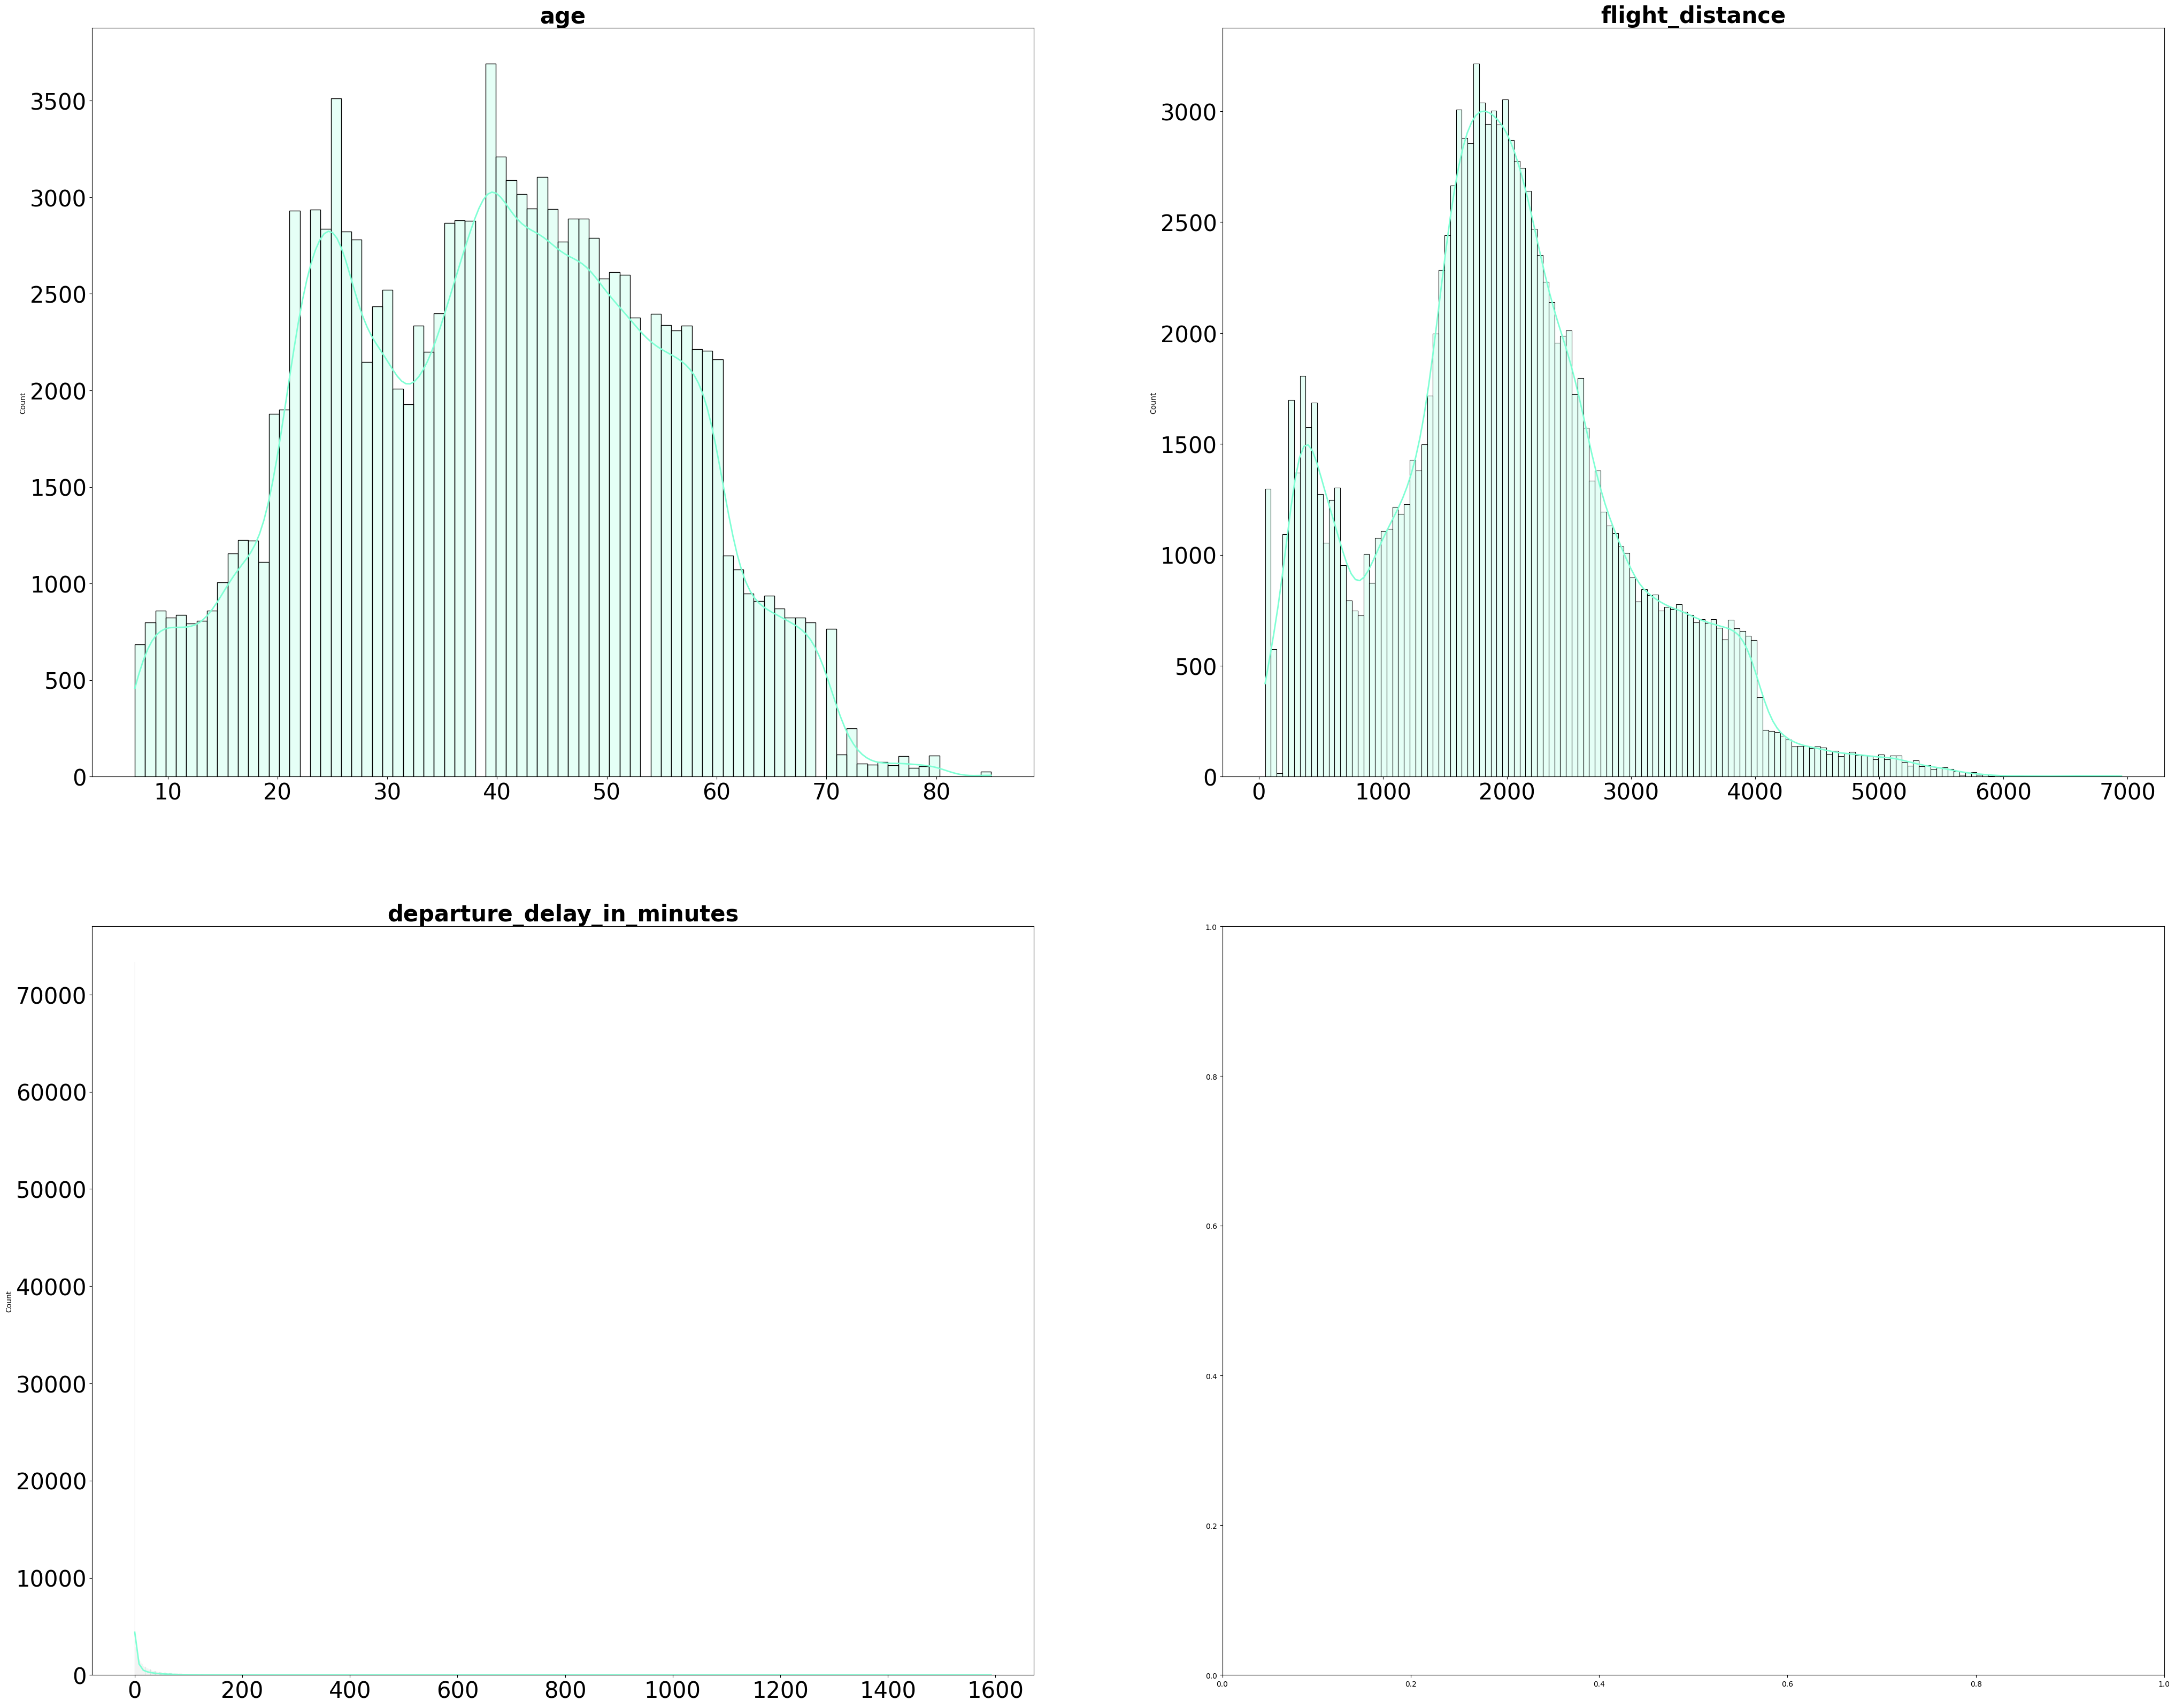

In [40]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (50, 40))

lista_colores = ["blue", "green", "orange"]

axes = axes.flat


for i, colum in enumerate(df_numericas.columns): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = 'aquamarine', 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 30, fontweight = "bold")
    axes[i].tick_params(labelsize = 30)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [ ]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,0,3,5,3,2,0,0.0


In [ ]:
variables_categoricas = ['gender', 'customer_type', 'type_of_travel', 'class', 'seat_comfort', 'departure/arrival_time_convenient', 'food_and_drink', 'gate_location', 'inflight_wifi_service', 'inflight_entertainment', 'online_support', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding']

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))

axes = axes.flat


for i, colum in enumerate(columnas_c.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Cambiamos el tipo de las columnas para que sean categóricas

In [ ]:
for i in variables_categoricas:
    df[i] = df[i].astype("category")


Comprobamos el cambio

In [4]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

Las añadimos a nuestra lista de categóricas.

In [5]:
variables_categoricas = ['satisfaction', 'gender', 'customer_type', 'type_of_travel', 'class', 'seat_comfort', 'departure/arrival_time_convenient', 'food_and_drink', 'gate_location', 'inflight_wifi_service', 'inflight_entertainment', 'online_support', 'ease_of_online_booking', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding' ]

In [ ]:
variables_categoricas

['satisfaction',
 'gender',
 'customer_type',
 'type_of_travel',
 'class',
 'seat_comfort',
 'departure/arrival_time_convenient',
 'food_and_drink',
 'gate_location',
 'inflight_wifi_service',
 'inflight_entertainment',
 'online_support',
 'ease_of_online_booking',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding']

In [ ]:
df.dtypes

satisfaction                           object
gender                               category
customer_type                        category
age                                     int64
type_of_travel                       category
class                                category
flight_distance                         int64
seat_comfort                         category
departure/arrival_time_convenient    category
food_and_drink                       category
gate_location                        category
inflight_wifi_service                category
inflight_entertainment               category
online_support                       category
on-board_service                     category
leg_room_service                     category
baggage_handling                     category
checkin_service                      category
cleanliness                          category
online_boarding                      category
departure_delay_in_minutes              int64
arrival_delay_in_minutes          

## Gráfico de correlación o Heatmap


In [ ]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,age,flight_distance,departure_delay_in_minutes
0,65,265,0
1,47,2464,310
2,15,2138,0
3,60,623,0
4,70,354,0


In [ ]:
correlacion = df_numericas.corr()
correlacion

,age,flight_distance,departure_delay_in_minutes
age,1.000000,-0.249625,-0.009041
flight_distance,-0.249625,1.000000,0.112555
departure_delay_in_minutes,-0.009041,0.112555,1.000000


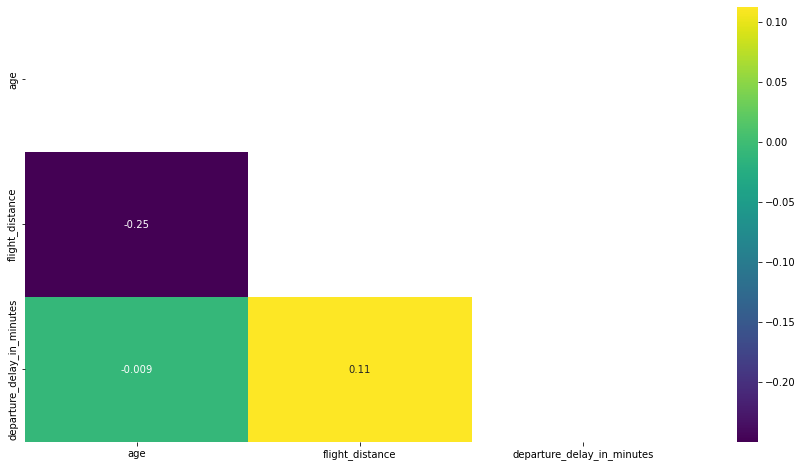

In [ ]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

In [ ]:
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,0,3,5,3,2,0,0.0


Vemos que la columna food and drink se podría eliminar, al igual que departure delay in minutes

In [ ]:
columnas_a_eliminar = ['food_and_drink', 'departure_delay_in_minutes']
df.drop(columnas_a_eliminar, axis=1, inplace=True)

# Preprocesamiento

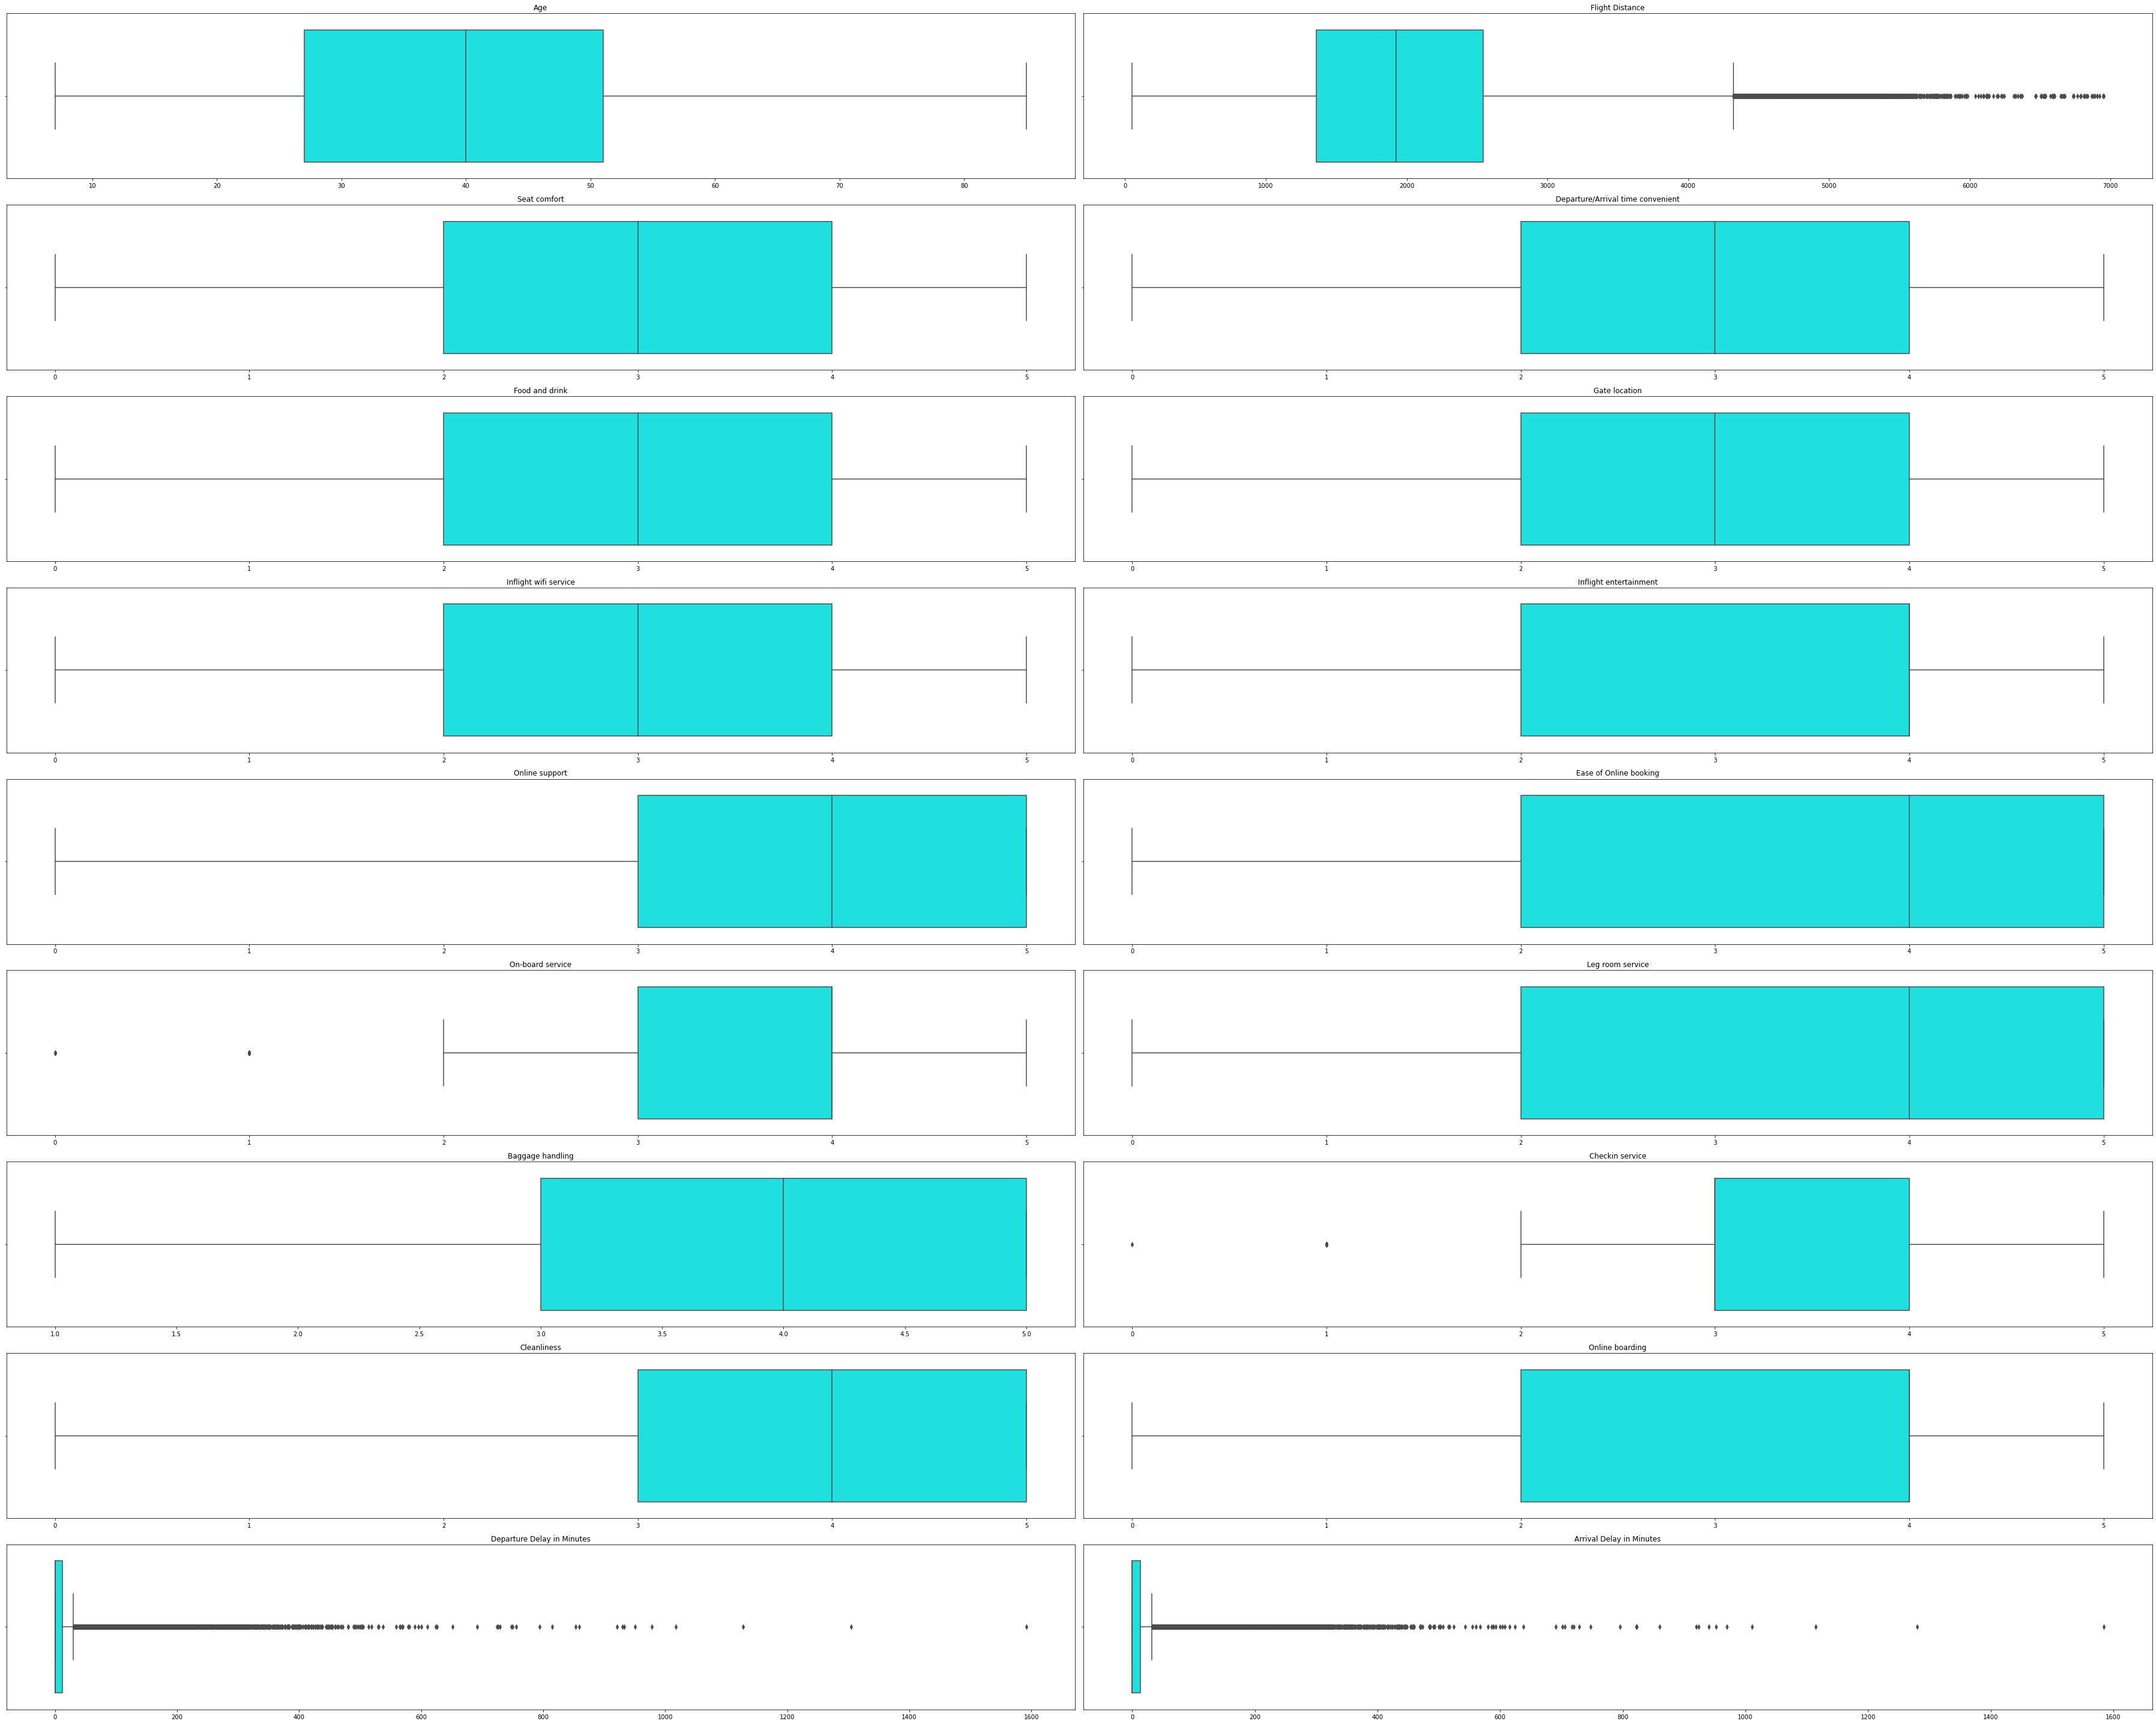

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(50,40))

categorias = df_numericas.columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

In [ ]:
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,2,2,4,2,3,0,3,5,3,2,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,3,0,2,2,4,4,4,2,3,2,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,3,2,0,2,3,3,4,4,4,2,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,3,3,4,3,1,0,1,4,1,3,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,3,4,2,0,2,4,2,5,0.0


In [ ]:

df.to_pickle('../datos/Invistico_Airline_2.pkl')

